# Testing different motion sensors

Here the aim is to look at the different directions. I performed the following sequence: 

1. phone lying still on table
2. Put phone on chest
3. Back-forth motion x10
4. Sideways motion (left-right) x10
5. Up-down motion x10

Importing libraries needed to run the rest of the notebook

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy.signal import savgol_filter
%matplotlib inline

## Read and check Data

Reading CSV files from [Physics Toolbox Sensor Suite](https://play.google.com/store/apps/dev?id=6483394247866966083&hl=en) by [Vieyra Software](https://www.vieyrasoftware.net/).

In [2]:
filename = '2023-01-0312.22.56.csv'
data = pd.read_csv(filename, delimiter=';',decimal=',',index_col=0, low_memory=False)

### Check files

Before moving on we should briefly check what we have imported.

In [3]:
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s),Unnamed: 22
time,,,,,,,,,,,,,,,,,,,,,
0.052373,"0,0134","−0,0452","0,9733","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",0.0000,...,"0,0000",0.0,0.000,"0,0000","0,0000",−∞,0.000000,0.000000,0.0,NaN
0.052657,"0,0134","−0,0452","0,9733","0,0000","0,0000","0,0000","0,0386","0,0472","−0,0060",0.0000,...,"0,0000",0.0,0.000,"0,0000","0,0000",−∞,59.932345,10.718662,0.0,NaN
0.052815,"0,0134","−0,0452","0,9733","0,1873","−0,4752","−0,2676","0,0386","0,0472","−0,0060",0.0000,...,"0,0000",0.0,0.000,"0,0000","0,0000",−∞,59.932345,10.718662,0.0,NaN
0.064592,"0,0134","−0,0452","0,9733","0,1873","−0,4752","−0,2676","0,0386","0,0472","−0,0060",0.0000,...,"0,0000",19.0,0.000,"0,0000","0,0000",−∞,59.932345,10.718662,0.0,NaN
0.103328,"−0,0015","−0,0454","0,9948","0,1873","−0,4752","−0,2676","0,0386","0,0472","−0,0060",0.0000,...,"0,0000",19.0,0.000,"0,0000","0,0000",−∞,59.932345,10.718662,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133.366105,"−0,1268","0,0022","1,0420","−0,6307","0,1668","0,4251","0,0539","0,3606","0,0302",1013.4795,...,"−36,0000",26.0,217.783,"0,8485","−3,5774","48,1502",59.932744,10.718783,0.0,NaN
133.366891,"−0,0955","−0,0198","1,0603","−0,6307","0,1668","0,4251","0,0539","0,3606","0,0302",1013.4795,...,"−36,0000",26.0,217.783,"0,8485","−3,5774","48,1502",59.932744,10.718783,0.0,NaN
133.386105,"0,0579","−0,0134","0,9062","−0,6307","0,1668","0,4251","0,0539","0,3606","0,0302",1013.4795,...,"−36,0000",26.0,217.783,"0,8485","−3,5774","48,1502",59.932744,10.718783,0.0,NaN


There is one column too much, due to a semicolon at the end of the file. Therefore, we remove the extra column like this:

In [4]:
data = data.drop(data.columns[21],axis=1)
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
time,,,,,,,,,,,,,,,,,,,,,
0.052373,"0,0134","−0,0452","0,9733","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",0.0000,...,"0,0000","0,0000",0.0,0.000,"0,0000","0,0000",−∞,0.000000,0.000000,0.0
0.052657,"0,0134","−0,0452","0,9733","0,0000","0,0000","0,0000","0,0386","0,0472","−0,0060",0.0000,...,"0,0000","0,0000",0.0,0.000,"0,0000","0,0000",−∞,59.932345,10.718662,0.0
0.052815,"0,0134","−0,0452","0,9733","0,1873","−0,4752","−0,2676","0,0386","0,0472","−0,0060",0.0000,...,"0,0000","0,0000",0.0,0.000,"0,0000","0,0000",−∞,59.932345,10.718662,0.0
0.064592,"0,0134","−0,0452","0,9733","0,1873","−0,4752","−0,2676","0,0386","0,0472","−0,0060",0.0000,...,"0,0000","0,0000",19.0,0.000,"0,0000","0,0000",−∞,59.932345,10.718662,0.0
0.103328,"−0,0015","−0,0454","0,9948","0,1873","−0,4752","−0,2676","0,0386","0,0472","−0,0060",0.0000,...,"0,0000","0,0000",19.0,0.000,"0,0000","0,0000",−∞,59.932345,10.718662,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133.366105,"−0,1268","0,0022","1,0420","−0,6307","0,1668","0,4251","0,0539","0,3606","0,0302",1013.4795,...,"−6,3000","−36,0000",26.0,217.783,"0,8485","−3,5774","48,1502",59.932744,10.718783,0.0
133.366891,"−0,0955","−0,0198","1,0603","−0,6307","0,1668","0,4251","0,0539","0,3606","0,0302",1013.4795,...,"−6,3000","−36,0000",26.0,217.783,"0,8485","−3,5774","48,1502",59.932744,10.718783,0.0
133.386105,"0,0579","−0,0134","0,9062","−0,6307","0,1668","0,4251","0,0539","0,3606","0,0302",1013.4795,...,"−6,3000","−36,0000",26.0,217.783,"0,8485","−3,5774","48,1502",59.932744,10.718783,0.0


Let us just check what data types we have read in: 

In [5]:
data.dtypes

gFx             object
gFy             object
gFz             object
ax              object
ay              object
az              object
wx              object
wy              object
wz              object
p              float64
Bx              object
By              object
Bz              object
I              float64
Azimuth        float64
Pitch           object
Roll            object
Gain            object
Latitude       float64
Longitude      float64
Speed (m/s)    float64
dtype: object

There is obviously something wrong, since only one column has loaded with float values. By visual inspection we see that the minus signs are coded with a − (n-dash) instead of hyphen. This makes the importer fail, so that the decimal marker has not properly been changed from comma (,) to dot (.). So we need to change this. 

In [6]:
# Replacing n-dash with hyphen
data=data.replace(to_replace='−', value='-',regex=True)
# Replacing comma with dot
data=data.replace(to_replace=',', value='.',regex=True)
# Replacing comma with dot
data=data.replace(to_replace='∞', value='0',regex=True)
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
time,,,,,,,,,,,,,,,,,,,,,
0.052373,0.0134,-0.0452,0.9733,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,0.000,0.0000,0.0000,-0,0.000000,0.000000,0.0
0.052657,0.0134,-0.0452,0.9733,0.0000,0.0000,0.0000,0.0386,0.0472,-0.0060,0.0000,...,0.0000,0.0000,0.0,0.000,0.0000,0.0000,-0,59.932345,10.718662,0.0
0.052815,0.0134,-0.0452,0.9733,0.1873,-0.4752,-0.2676,0.0386,0.0472,-0.0060,0.0000,...,0.0000,0.0000,0.0,0.000,0.0000,0.0000,-0,59.932345,10.718662,0.0
0.064592,0.0134,-0.0452,0.9733,0.1873,-0.4752,-0.2676,0.0386,0.0472,-0.0060,0.0000,...,0.0000,0.0000,19.0,0.000,0.0000,0.0000,-0,59.932345,10.718662,0.0
0.103328,-0.0015,-0.0454,0.9948,0.1873,-0.4752,-0.2676,0.0386,0.0472,-0.0060,0.0000,...,0.0000,0.0000,19.0,0.000,0.0000,0.0000,-0,59.932345,10.718662,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133.366105,-0.1268,0.0022,1.0420,-0.6307,0.1668,0.4251,0.0539,0.3606,0.0302,1013.4795,...,-6.3000,-36.0000,26.0,217.783,0.8485,-3.5774,48.1502,59.932744,10.718783,0.0
133.366891,-0.0955,-0.0198,1.0603,-0.6307,0.1668,0.4251,0.0539,0.3606,0.0302,1013.4795,...,-6.3000,-36.0000,26.0,217.783,0.8485,-3.5774,48.1502,59.932744,10.718783,0.0
133.386105,0.0579,-0.0134,0.9062,-0.6307,0.1668,0.4251,0.0539,0.3606,0.0302,1013.4795,...,-6.3000,-36.0000,26.0,217.783,0.8485,-3.5774,48.1502,59.932744,10.718783,0.0


In [7]:
# Now that the data should have been formatted correctly, we can change to float64
data=data.astype(float)
data.dtypes

gFx            float64
gFy            float64
gFz            float64
ax             float64
ay             float64
az             float64
wx             float64
wy             float64
wz             float64
p              float64
Bx             float64
By             float64
Bz             float64
I              float64
Azimuth        float64
Pitch          float64
Roll           float64
Gain           float64
Latitude       float64
Longitude      float64
Speed (m/s)    float64
dtype: object

Then we should be ready to go. Let us just check the sampling rate first.

In [8]:
# The sampling rate is the total number of samples divided by time
sr = len(data)/data.index[-1]
sr

169.9410837922897

## Getting an overview of the data

Then we can look at some basic descriptive statistics.

In [9]:
data.describe(include='all')

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
count,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,...,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,22668.000000,22668.0
mean,-0.577451,0.036960,0.506730,-0.064699,-0.016125,0.002814,-0.004517,0.001681,-0.000253,1012.543086,...,35.804145,-22.327536,24.209944,155.390561,-16.477420,-46.124369,54.554208,59.929791,10.717274,0.0
std,0.485155,0.126298,0.439871,0.803051,0.577380,0.744037,0.288165,0.431443,0.239869,29.327550,...,21.055140,15.324716,10.602155,158.068656,48.757788,38.878783,9.119932,0.398066,0.071189,0.0
min,-1.544100,-0.470300,-0.559200,-7.724100,-5.321200,-5.000000,-2.998700,-4.727600,-2.718300,0.000000,...,-42.840000,-44.040000,0.000000,0.000000,-177.701500,-89.990400,-0.000000,0.000000,0.000000,0.0
25%,-0.989200,-0.044200,0.161700,-0.125500,-0.045200,-0.043700,-0.011500,-0.035600,-0.013400,1013.362800,...,33.360000,-37.920000,19.000000,6.805050,-4.246300,-80.327200,49.300100,59.932440,10.717245,0.0
50%,-0.893200,0.022200,0.271700,-0.008800,-0.002300,0.043500,0.000100,-0.000200,-0.000200,1013.387200,...,47.400000,-16.620000,20.000000,32.054400,-2.504500,-74.435100,52.500200,59.932440,10.717245,0.0
75%,-0.031000,0.071600,1.004100,0.025500,0.055400,0.074400,0.019000,0.021275,0.008600,1013.422400,...,50.460000,-11.940000,25.000000,357.782300,2.502600,-1.888000,56.499600,59.932452,10.718533,0.0
max,1.320500,0.849000,1.705100,5.896100,2.927900,9.481900,2.782000,3.534900,2.196100,1013.512500,...,58.140000,19.980000,120.000000,359.998700,179.884800,64.544600,96.744400,59.932876,10.719039,0.0


A basic plot of all the data will give us an idea about the temporal development.

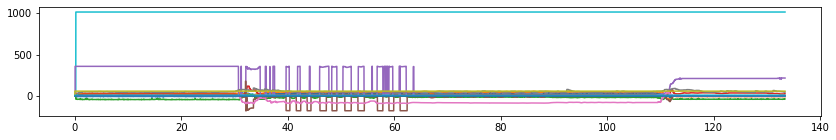

In [10]:
fig = plt.figure(figsize=(14,2))
plt.plot(data);

It is difficult to see exactly what is happening at the beginning and end. Since the accelerometer data may be what we are most interested in, let us only plot that data stream.

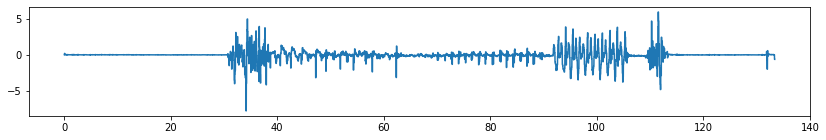

In [11]:
fig = plt.figure(figsize=(14,2))
plt.plot(data.ax);

We can see that there is a lot of movement in the beginning and end. This is when I moved the mobile phone before and after the experiment. So I want to remove those parts. 

In [12]:
data_without_beginning = data.tail(-1500)

In [13]:
data_clean = data_without_beginning.head(-500)

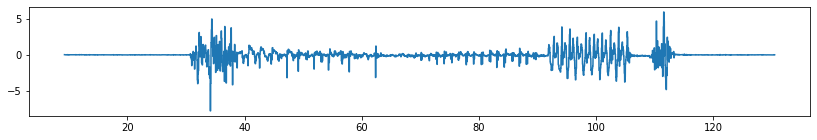

In [14]:
fig = plt.figure(figsize=(14,2))
plt.plot(data_clean.ax);

In [15]:
data_clean

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
time,,,,,,,,,,,,,,,,,,,,,
9.243901,-0.0029,-0.0454,1.0044,0.0200,-0.0125,0.0360,-0.0001,-0.0006,-0.0016,1013.3711,...,34.20,-41.22,24.0,358.7321,2.5019,-0.1447,45.1197,59.932345,10.718662,0.0
9.261529,-0.0007,-0.0447,1.0051,0.0200,-0.0125,0.0360,-0.0001,-0.0006,-0.0016,1013.3711,...,34.20,-41.22,24.0,358.7321,2.5019,-0.1447,45.1197,59.932345,10.718662,0.0
9.262987,-0.0007,-0.0447,1.0051,0.0200,-0.0125,0.0360,-0.0001,-0.0006,-0.0016,1013.3711,...,33.66,-39.84,24.0,358.7321,2.5019,-0.1447,45.1197,59.932345,10.718662,0.0
9.263983,-0.0007,-0.0447,1.0051,0.0200,-0.0125,0.0360,-0.0001,-0.0006,-0.0016,1013.3711,...,33.66,-39.84,24.0,358.7321,2.5019,-0.1447,45.1197,59.932345,10.718662,0.0
9.281162,-0.0012,-0.0452,1.0036,0.0200,-0.0125,0.0360,-0.0001,-0.0006,-0.0016,1013.3711,...,33.66,-39.84,24.0,358.7321,2.5019,-0.1447,45.1197,59.932345,10.718662,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130.425911,-0.0342,-0.0208,1.0051,0.0066,0.0069,0.0582,0.0008,-0.0005,0.0003,1013.4539,...,-4.62,-37.86,32.0,212.3244,1.1873,-1.9138,50.7538,59.932876,10.719039,0.0
130.426420,-0.0342,-0.0208,1.0051,0.0066,0.0069,0.0582,0.0008,-0.0005,0.0003,1013.4475,...,-4.62,-37.86,32.0,212.3244,1.1873,-1.9138,50.7538,59.932876,10.719039,0.0
130.444832,-0.0330,-0.0210,1.0054,0.0066,0.0069,0.0582,0.0008,-0.0005,0.0003,1013.4475,...,-4.62,-37.86,32.0,212.3244,1.1873,-1.9138,50.7538,59.932876,10.719039,0.0


Now we finally have a dataset that we can investigate further. Before moving on, let us save it as a clean CSV file. 

| Name           | Description   | Unit |
|:----           |:-----------   |:---- |
| gFx            | g-force X     | FN/Fg |
| gFy            | g-force Y     | FN/Fg |
| gFz            | g-force Z     | FN/Fg |
| ax             | linear acceleration X | m/s2 |
| ay             | linear acceleration Y | m/s2 |
| az             | linear acceleration Z | m/s2 |
| wx             | gyroscope X   | rad/s |
| wy             | gyroscope Y   | rad/s |
| wz             | gyroscope Z   | rad/s |
| p              | barometer     | Pa |
| Bx             | magnetometer X | μT |
| By             | magnetometer Y | μT |
| Bz             | magnetometer Z | μT |
| I              | light meter   | lx |
| Azimuth        | inclinometer  | |
| Pitch          | inclinometer  | |
| Roll           | inclinometer  | |
| Gain           | sound meter   | dB |
| Latitude       | GPS Latitude  | degrees |
| Longitude      | GPS Longitude | degrees |
| Speed | m/s)   | GPS Speed     | km/h |

## Accelerometer data

Let us start by looking at the temporal development of data from the 3-axis accelerometer.

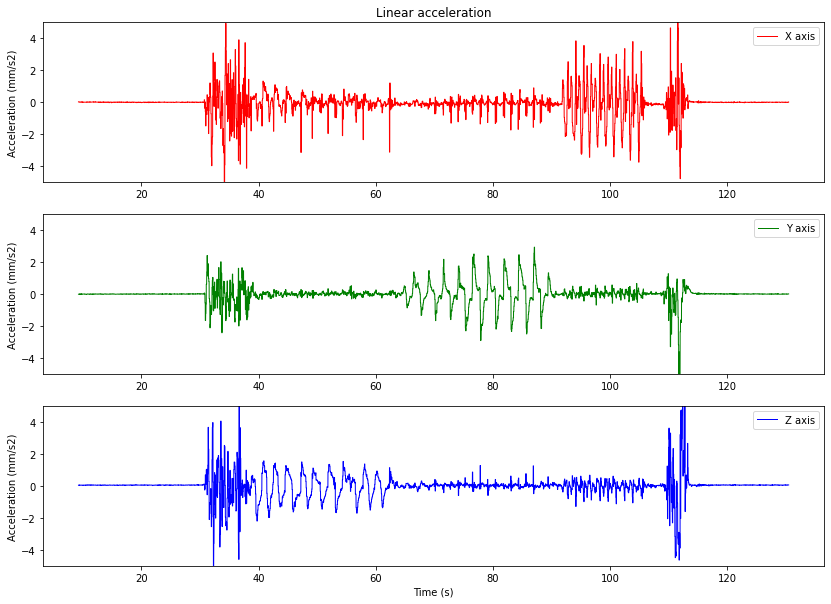

In [16]:
fig = plt.figure(figsize=(14,10))
aa1 = plt.subplot(3, 1, 1)
aa1.plot(data_clean['ax'], lw=1, label='X axis', color='red')
aa1.legend(loc='upper right')
aa1.set_ylim(-5, 5)
plt.ylabel('Acceleration (mm/s2)');
plt.title('Linear acceleration')

aa2 = plt.subplot(3, 1, 2)
aa2.plot(data_clean['ay'], lw=1, label='Y axis', color='green')
aa2.legend(loc='upper right')
aa2.set_ylim(-5, 5)
plt.ylabel('Acceleration (mm/s2)');

aa3 = plt.subplot(3, 1, 3)
aa3.plot(data_clean['az'], lw=1, label='Z axis', color='blue')
aa3.legend(loc='upper right')
aa3.set_ylim(-5, 5)
plt.ylabel('Acceleration (mm/s2)');

#plt.tick_params(axis='both', which='major')

plt.xlabel('Time (s)');
fig.savefig("accelerometer_time.png", bbox_inches='tight')

As expected, the data varies slightly over time, but the numbers are very small. We can also inspect the spatial distribution of the same sensor data.

## Gyroscope

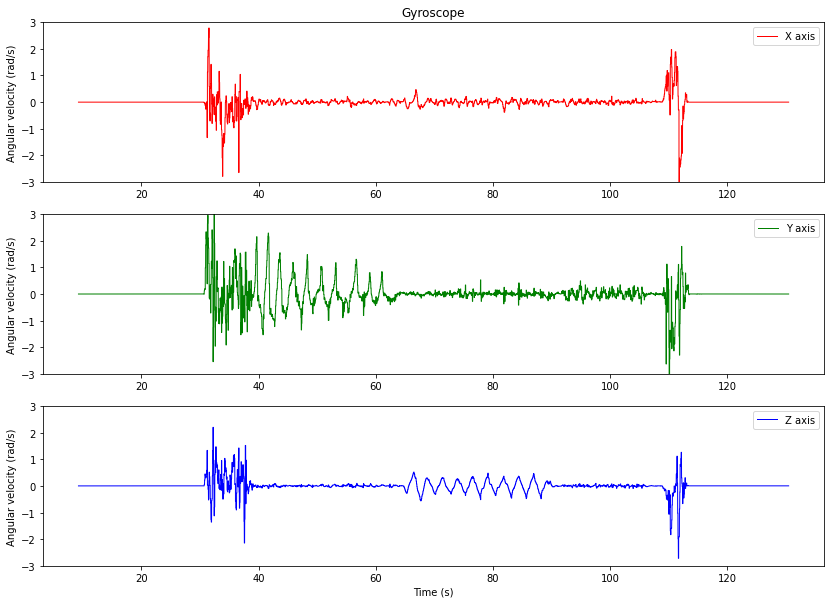

In [17]:
fig = plt.figure(figsize=(14,10))
aa1 = plt.subplot(3, 1, 1)
aa1.plot(data_clean['wx'], lw=1, label='X axis', color='red') #Displacement on x axis
aa1.legend(loc='upper right')
aa1.set_ylim(-3, 3)
plt.ylabel('Angular velocity (rad/s)');
plt.title('Gyroscope')

aa2 = plt.subplot(3, 1, 2)
aa2.plot(data_clean['wy'], lw=1, label='Y axis', color='green') #Displacement on x axis
aa2.legend(loc='upper right')
aa2.set_ylim(-3, 3)
plt.ylabel('Angular velocity (rad/s)');

aa3 = plt.subplot(3, 1, 3)
aa3.plot(data_clean['wz'], lw=1, label='Z axis', color='blue') #Displacement on x axis
aa3.legend(loc='upper right')
aa3.set_ylim(-3, 3)
plt.ylabel('Angular velocity (rad/s)');

#plt.tick_params(axis='both', which='major')

plt.xlabel('Time (s)');
fig.savefig("gyroscope_time.png", bbox_inches='tight')

### G-force meter

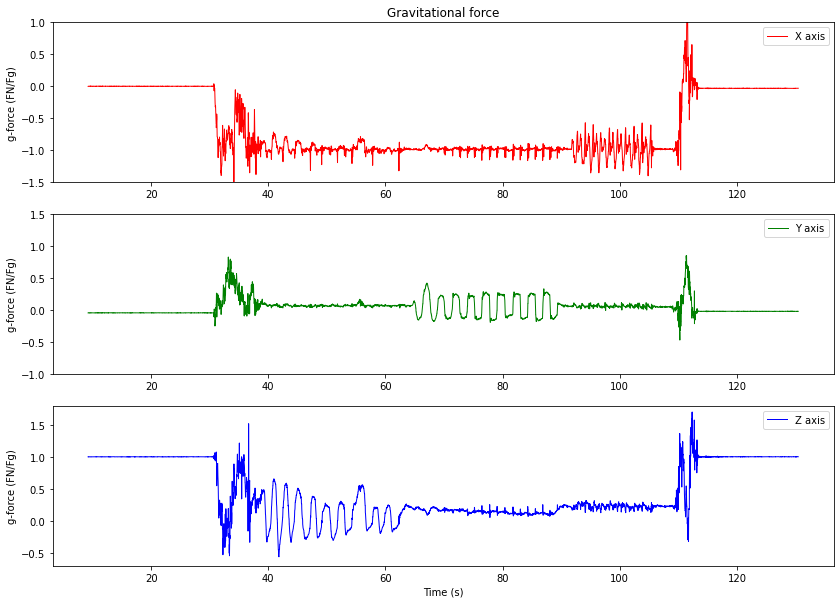

In [18]:
fig = plt.figure(figsize=(14,10))
aa1 = plt.subplot(3, 1, 1)
aa1.plot(data_clean['gFx'], lw=1, label='X axis', color='red') #Displacement on x axis
aa1.legend(loc='upper right')
aa1.set_ylim(-1.5, 1)
plt.ylabel('g-force (FN/Fg)');
plt.title('Gravitational force')

aa2 = plt.subplot(3, 1, 2)
aa2.plot(data_clean['gFy'], lw=1, label='Y axis', color='green') #Displacement on y axis
aa2.set_ylim(-1, 1.5)
aa2.legend(loc='upper right')
plt.ylabel('g-force (FN/Fg)');

aa3 = plt.subplot(3, 1, 3)
aa3.plot(data_clean['gFz'], lw=1, label='Z axis', color='blue') #Displacement on z axis
aa3.set_ylim(-0.7, 1.8)
aa3.legend(loc='upper right')
plt.ylabel('g-force (FN/Fg)');

#plt.tick_params(axis='both', which='major')

plt.xlabel('Time (s)');
fig.savefig("g-force-time.png", bbox_inches='tight')

## Magnetometer

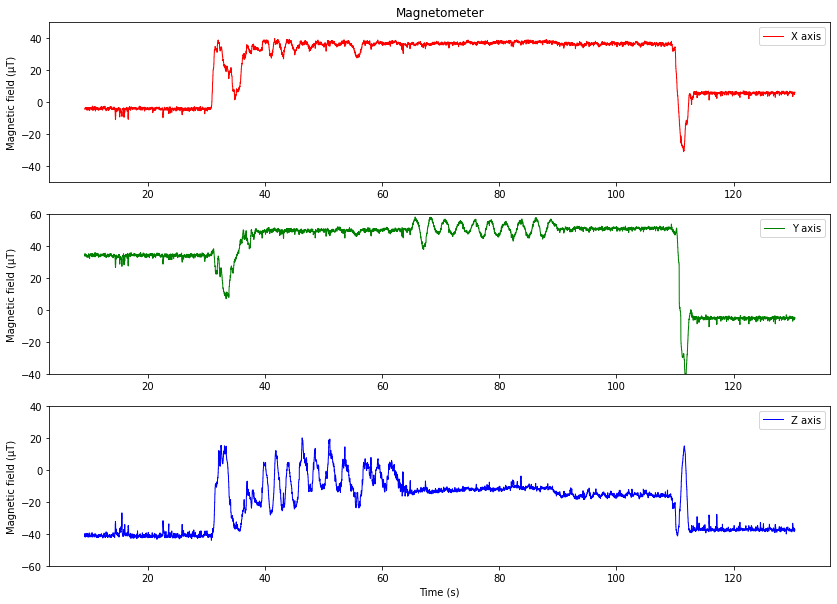

In [19]:
fig = plt.figure(figsize=(14,10))
aa1 = plt.subplot(3, 1, 1)
aa1.plot(data_clean['Bx'], lw=1, label='X axis', color='red') #Displacement on x axis
aa1.legend(loc='upper right')
aa1.set_ylim(-50, 50)
plt.ylabel('Magnetic field (μT)');
plt.title('Magnetometer')

aa2 = plt.subplot(3, 1, 2)
aa2.plot(data_clean['By'], lw=1, label='Y axis', color='green') #Displacement on y axis
aa2.set_ylim(-40, 60)
aa2.legend(loc='upper right')
plt.ylabel('Magnetic field (μT)');

aa3 = plt.subplot(3, 1, 3)
aa3.plot(data_clean['Bz'], lw=1, label='Z axis', color='blue') #Displacement on z axis
aa3.set_ylim(-60, 40)
aa3.legend(loc='upper right')
plt.ylabel('Magnetic field (μT)');

#plt.tick_params(axis='both', which='major')

plt.xlabel('Time (s)');
fig.savefig("magnetometer-time.png", bbox_inches='tight')

## Inclinometer

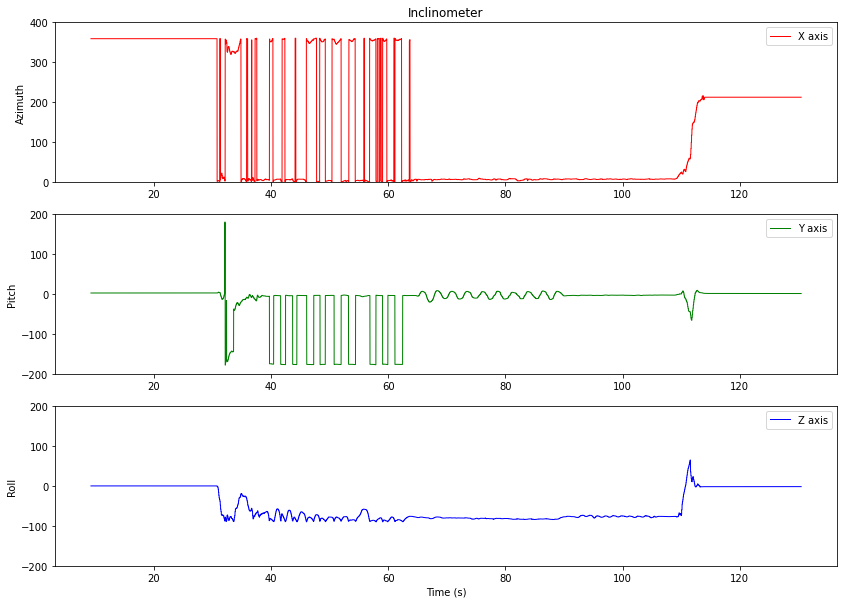

In [20]:
fig = plt.figure(figsize=(14,10))
aa1 = plt.subplot(3, 1, 1)
aa1.plot(data_clean['Azimuth'], lw=1, label='X axis', color='red') #Displacement on x axis
aa1.legend(loc='upper right')
aa1.set_ylim(0, 400)
plt.ylabel('Azimuth');
plt.title('Inclinometer')

aa2 = plt.subplot(3, 1, 2)
aa2.plot(data_clean['Pitch'], lw=1, label='Y axis', color='green') #Displacement on y axis
aa2.set_ylim(-200, 200)
aa2.legend(loc='upper right')
plt.ylabel('Pitch');

aa3 = plt.subplot(3, 1, 3)
aa3.plot(data_clean['Roll'], lw=1, label='Z axis', color='blue') #Displacement on z axis
aa3.set_ylim(-200, 200)
aa3.legend(loc='upper right')
plt.ylabel('Roll');

#plt.tick_params(axis='both', which='major')

plt.xlabel('Time (s)');
fig.savefig("inclinometer-time.png", bbox_inches='tight')